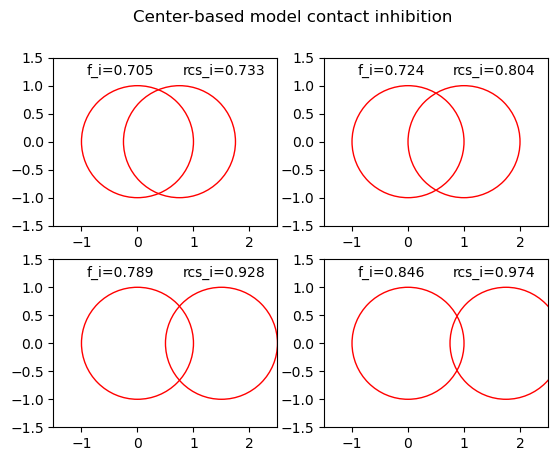

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# https://mathworld.wolfram.com/Circle-CircleIntersection.html
#fig, ax = plt.subplots(1)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Center-based model contact inhibition')

x_i = 0.0
y_i = 0.0
x_j = .75
y_j = 0
r_i = 1.
r_j = 1.
ax = [ax1,ax2,ax3,ax4]
x0 = [0.75,1.0,1.5,1.75]
for idx in range(4):
    x_j = x0[idx]
    c_i = Circle((x_i, y_i), r_i, edgecolor='r', facecolor='none')
    c_j = Circle((x_j, y_j), r_j, edgecolor='r', facecolor='none')
    ax[idx].add_patch(c_i)
    ax[idx].add_patch(c_j)
    ax[idx].set_xlim(-1.5, 2.5)
    ax[idx].set_ylim(-1.5, 1.5)
    ax[idx].set_aspect('equal', adjustable='box')
    #plt.show()
    
    xd = x_j-x_i
    yd = y_j-y_i
    d_ij = np.sqrt(xd*xd + yd*yd)
    # print("d_ij = ",d_ij)
    #  *d_ij^2 - r_j^2 + r_i^2) / (2 * d_ij * r_i)
    phi_ij = ( d_ij*d_ij - r_j*r_j + r_i*r_i ) / (2 * d_ij * r_i)
    # print("phi_ij = ",phi_ij)
    # free surface fraction of cell_i
    f_i = 1.0 - 1.0/np.pi * np.sqrt( 1.0 - phi_ij*phi_ij )   # for all nbrs j:  1 - 1/pi * SUM_j (sqrt(1 - phi_ij)
    # print("f_i = ",f_i)
    ax[idx].text(-0.9, 1.2, f'f_i={f_i:.3f}', fontsize = 10)
    
    # A_i/A_i0 = 1 - 1/pi SUM_j ( arccos(phi_ij) - phi_ij * sqrt(1 - phi_ij^2) )
    relative_compressed_size = 1.0 - 1.0/np.pi * (np.arccos(phi_ij) - phi_ij * np.sqrt(1.0 - phi_ij*phi_ij))
    # print("relative_compressed_size = ",pressure2)
    ax[idx].text(0.8, 1.2, f'rcs_i={relative_compressed_size:.3f}', fontsize = 10)

